In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets  
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [2]:
company = pd.read_csv("C:/Company_Data.csv")

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company_new = pd.get_dummies(company, columns=['ShelveLoc','Urban','US'])

In [5]:
company_new

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [6]:
company_new["NewSale"]="<=7.490000"
company_new.loc[company_new["Sales"]>=7.490000,"NewSale"]="HIGH"
company_new.loc[company_new["Sales"]<=7.490000,"NewSale"]="LOW"

In [7]:
company_new

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,NewSale
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,HIGH
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,HIGH
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1,HIGH
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1,LOW
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,0,1,0,0,1,0,1,HIGH
396,6.14,139,23,3,37,120,55,11,0,0,1,1,0,0,1,LOW
397,7.41,162,26,12,368,159,40,18,0,0,1,0,1,0,1,LOW
398,5.94,100,79,7,284,95,50,12,1,0,0,0,1,0,1,LOW


In [8]:
company1=company_new.drop('Sales',axis=1)

In [9]:
company1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,NewSale
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,HIGH
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,HIGH
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,HIGH
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,LOW
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,HIGH
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,LOW
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,LOW
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,LOW


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
labelencoder=LabelEncoder()
company1.iloc[:,14]=labelencoder.fit_transform(company1.iloc[:,14])
company1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,NewSale
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1,0
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1,1


In [12]:
x=company1.iloc[:,0:14]
y=company1.iloc[:,14]

In [13]:
#x=x.values.reshape(-1,1)
#y=y.values.reshape(-1,1)

In [14]:
y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: NewSale, Length: 400, dtype: int32

In [15]:
x

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [23]:
# Splitting data into training and testing data set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=40)

In [24]:
#Building model using entropy method
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

In [25]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

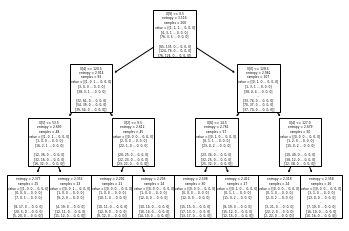

In [19]:
tree.plot_tree(model);

In [26]:
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    51
0    29
dtype: int64

In [27]:
preds

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [28]:
pd.crosstab(y_test,preds)

col_0,0,1
NewSale,,
0,20,15
1,9,36


In [29]:
#Accuracy
np.mean(preds==y_test)

0.7

In [30]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [31]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [32]:
#Prediction and computing the accuracy
pred=model_gini.predict(x_test)
np.mean(preds==y_test)

0.7